## Task-4 : Customer churn prediction with using Random Forest Classifier
### submitted 
#### By p.Balaji

In [1]:
## Install the necessary libraries
!pip install numpy
!pip install pandas
!pip install matplolib
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable

ERROR: Could not find a version that satisfies the requirement matplolib (from versions: none)
ERROR: No matching distribution found for matplolib



Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
dataset = pd.read_csv("C:\\Users\\91781\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Explore the data
print(dataset.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
# check the columns
print(dataset.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# check the null values in the dataset
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Drop irrelevant columns if needed
# Assuming 'customer_id' is irrelevant for predicting churn
if 'customer_id' in dataset.columns:
    dataset = dataset.drop(['customer_id'], axis=1)

In [9]:
# Convert categorical variables to numeric using Label Encoding
label_encoder = LabelEncoder()
for column in dataset.select_dtypes(include=['object']).columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

In [10]:
# Split the data into features (X) and target variable (y)
X = dataset.drop('Churn', axis=1)
y = dataset['Churn']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train a Random Forest Classifier model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [15]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7970191625266146
Confusion Matrix:
 [[943  93]
 [193 180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



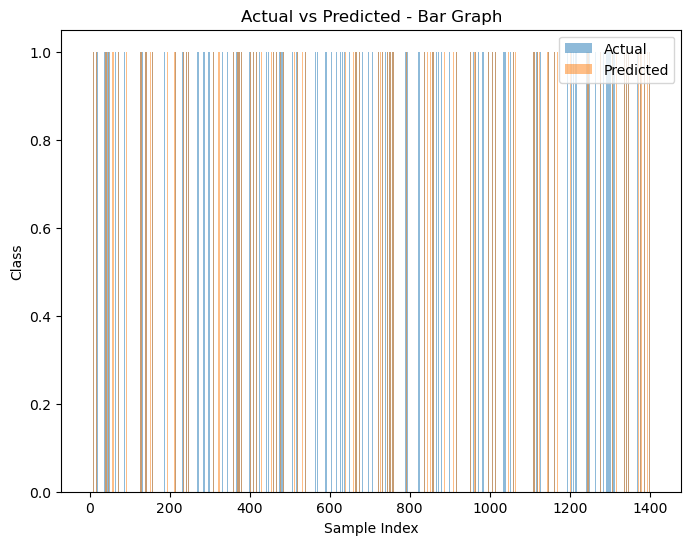

In [17]:
# Visulize the Bar graph
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(range(len(y_test)), y_test, alpha=0.5, label='Actual')
plt.bar(range(len(y_pred)), y_pred, alpha=0.5, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs Predicted - Bar Graph')
plt.legend()
plt.show()

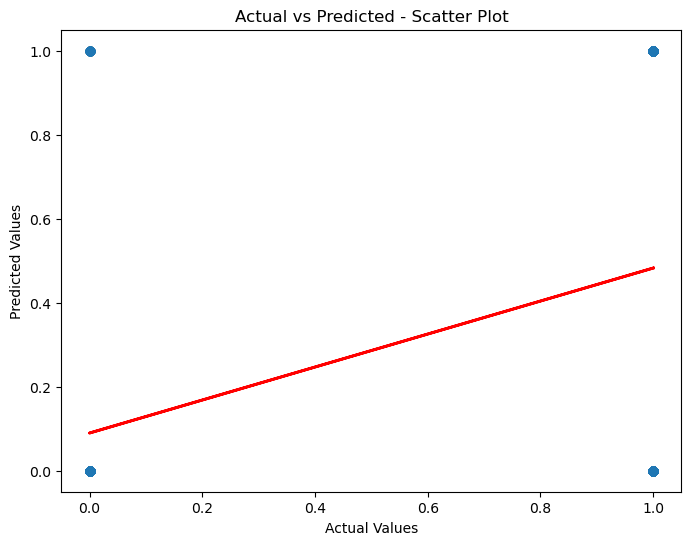

In [18]:
# Visulize the scatter plot
import matplotlib.pyplot as plt
import numpy as np
# Assuming y_test contains the actual values and y_pred contains the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Scatter Plot')

# Draw the line of best fit
fit = np.polyfit(y_test, y_pred, 1)
line = np.poly1d(fit)
plt.plot(y_test, line(y_test), color='red', linewidth=2)

plt.show()

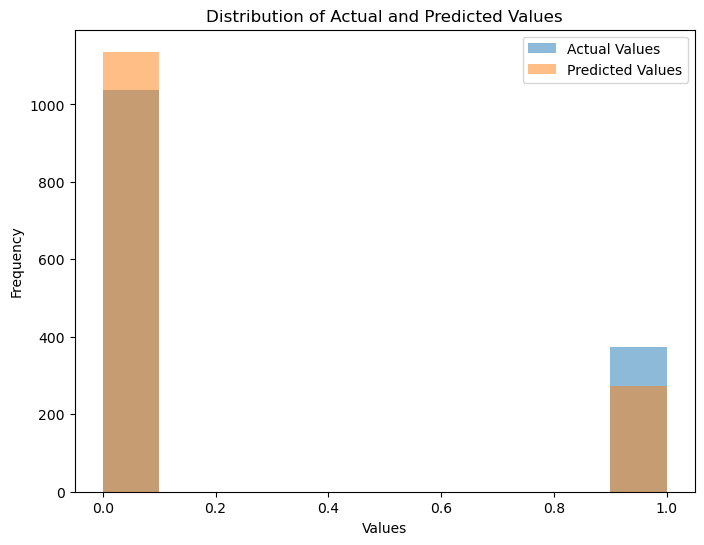

In [19]:
# visulize the graph for Difference between Actual and predicted vaslues
plt.figure(figsize=(8, 6))
plt.hist(y_test, alpha=0.5, label='Actual Values')
plt.hist(y_pred, alpha=0.5, label='Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Values')
plt.legend()
plt.show()

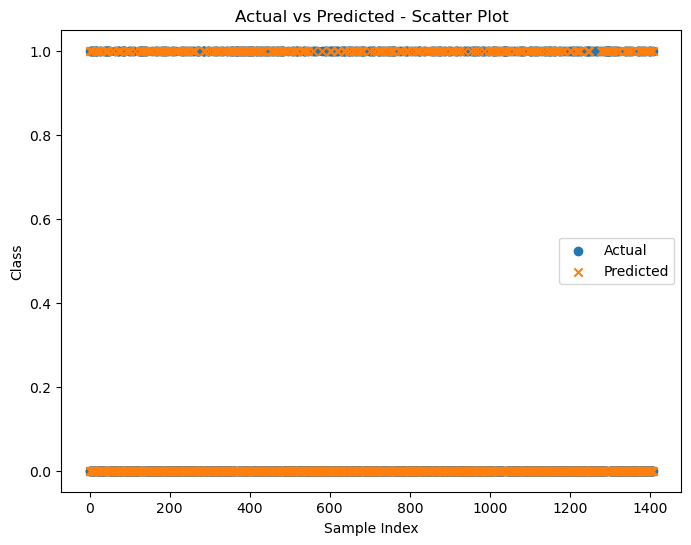

In [21]:
# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, marker='o', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, marker='x', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs Predicted - Scatter Plot')
plt.legend()
plt.show()

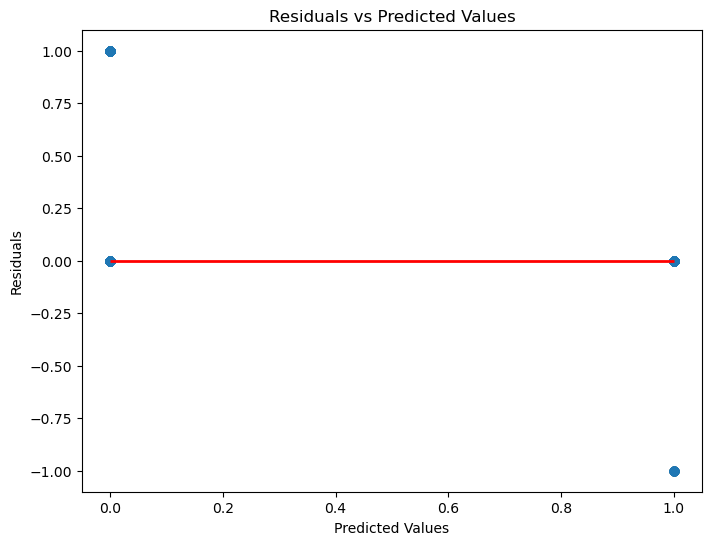

In [20]:
#  visulize the Residual graph
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.hlines(y=0, xmin=0, xmax=y_pred.max(), color='red', linewidth=2)
plt.show()

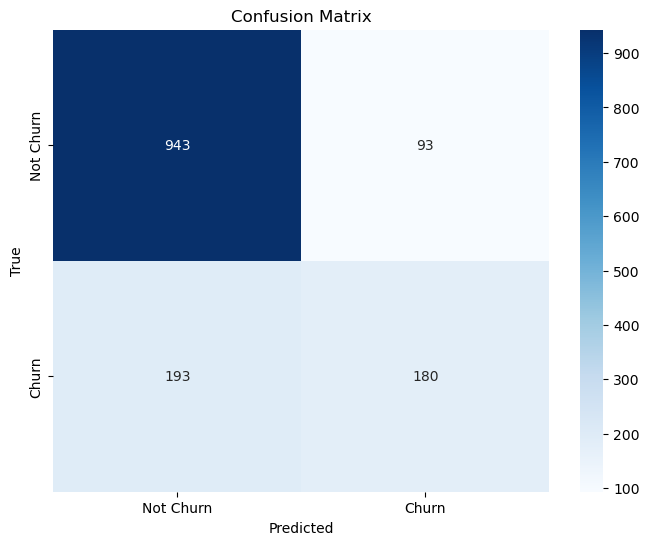

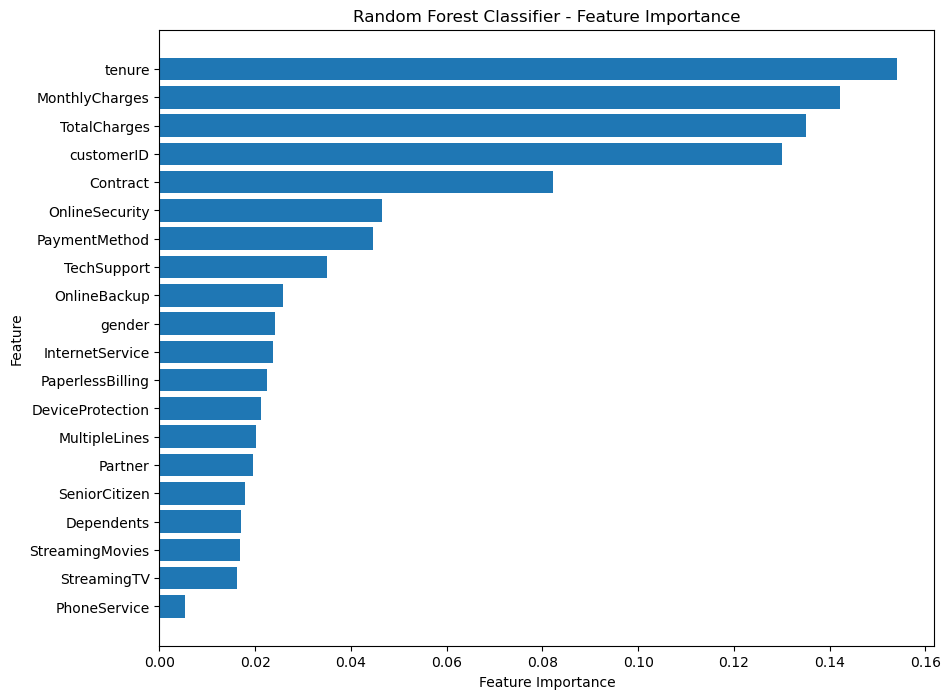

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Bar Plot
feature_importance = random_forest_model.feature_importances_
feature_names = X.columns
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()

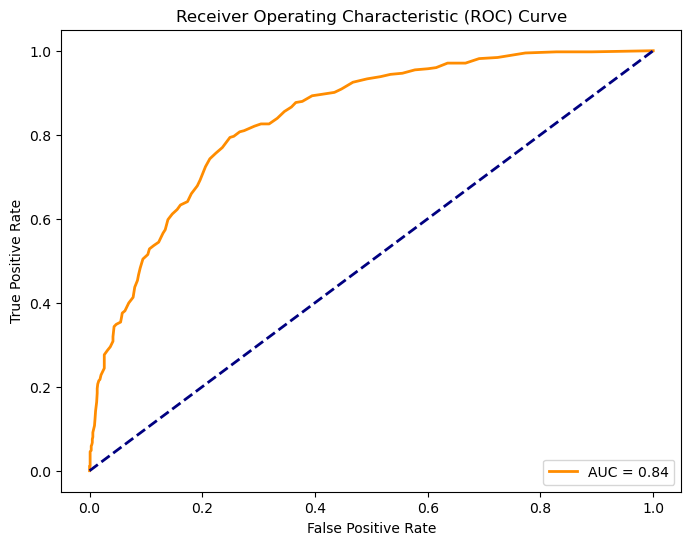

In [3]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_probs = random_forest_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

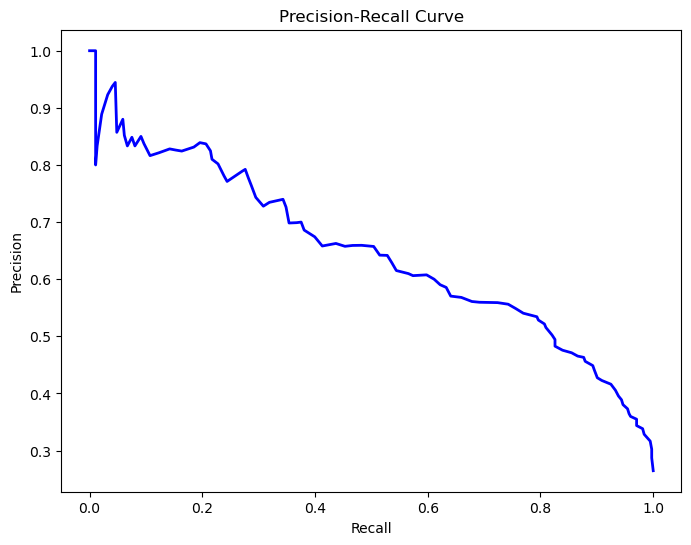

In [4]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

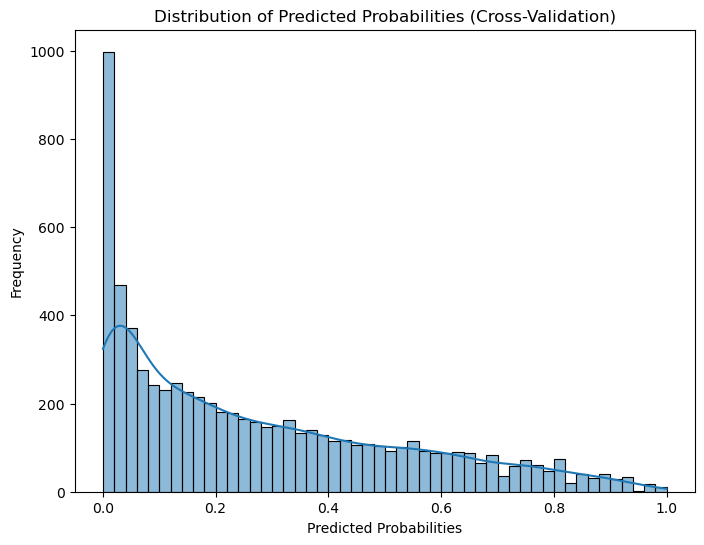

Cross-Validation ROC AUC: 0.83


In [5]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

# Perform cross-validation
y_probs_cv = cross_val_predict(random_forest_model, X, y, cv=5, method='predict_proba')[:, 1]

# Compute ROC AUC for cross-validation
roc_auc_cv = roc_auc_score(y, y_probs_cv)

# Plot the distribution of predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_probs_cv, bins=50, kde=True)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities (Cross-Validation)')
plt.show()

# Print ROC AUC for cross-validation
print(f'Cross-Validation ROC AUC: {roc_auc_cv:.2f}')